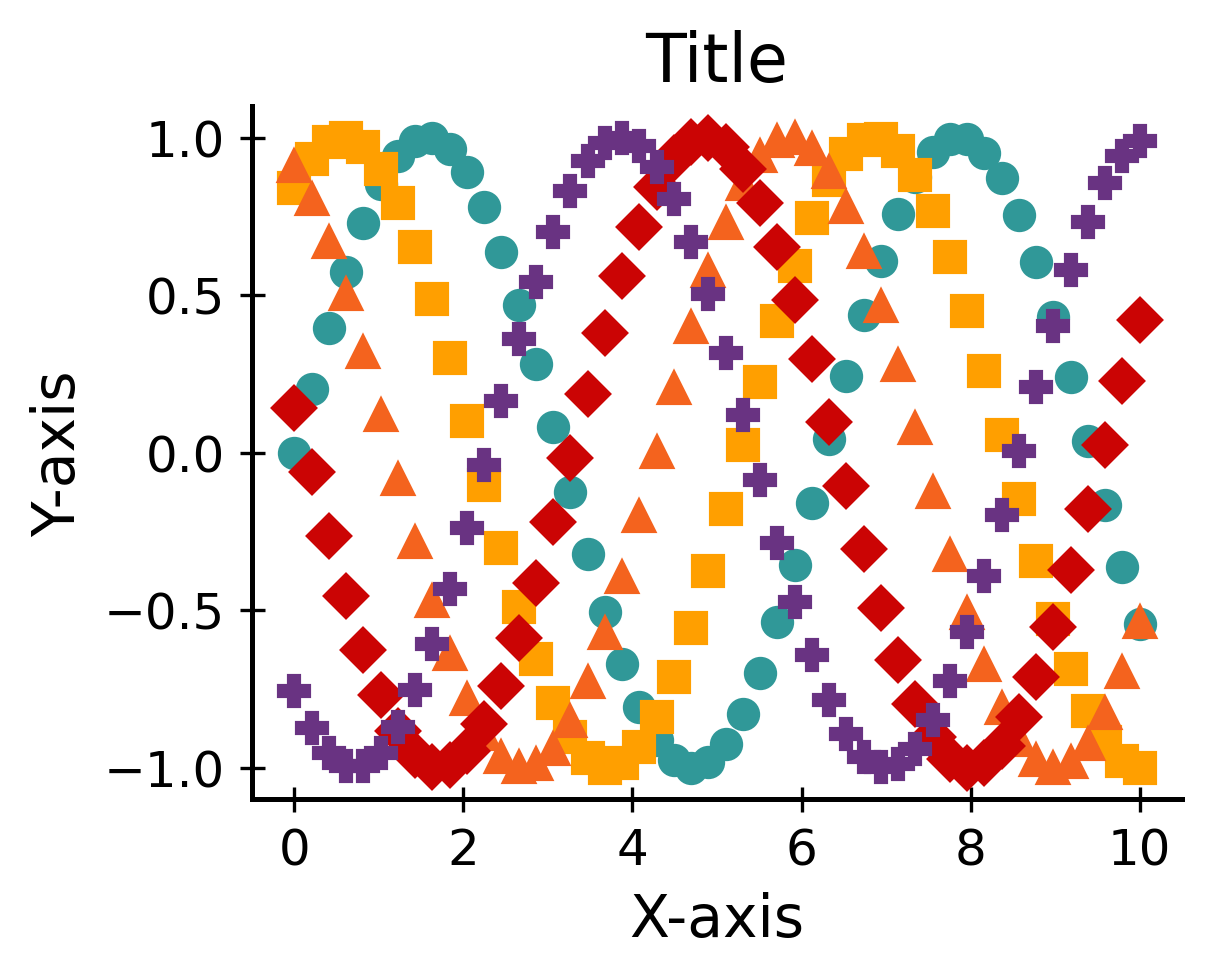

In [25]:
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import pandas as pd
# Example data
x = np.linspace(0, 10, 50)
ys = [np.sin(x + i) for i in range(5)]  # multiple lines

# --- Custom color and marker lists ---
colors = ['#309898', '#ff9f00', '#f4631e', '#cb0404', '#693382']   # blue, orange, green
markers = ["o", "s", "^", "D", "P"]                   # circle, square, diamond
plt.rcParams.update({
    "figure.figsize": (4, 3),         # Compact figure
    "figure.dpi": 300,                # High resolution for posters
    "font.size": 14,                  # Larger text
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "lines.linewidth": 2.5,           # Thicker lines
    "lines.markersize": 7,            # Larger markers
    "axes.spines.top": False,         # Clean up frame
    "axes.spines.right": False,
    "axes.linewidth": 1.2,
    "xtick.major.size": 6,            # Larger ticks
    "ytick.major.size": 6,
    "xtick.direction": "inout",       # Compact but readable ticks
    "ytick.direction": "inout",
    "legend.frameon": False           # Cleaner legend
})
# --- Configure the axis to cycle both colors and markers ---
plt.rc('axes', prop_cycle=cycler('color', colors) + cycler('marker', markers))

fig, ax = plt.subplots()
for y in ys:
    ax.plot(x, y, linestyle='')  # linestyle and marker size can be set globally

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Title')
plt.show()


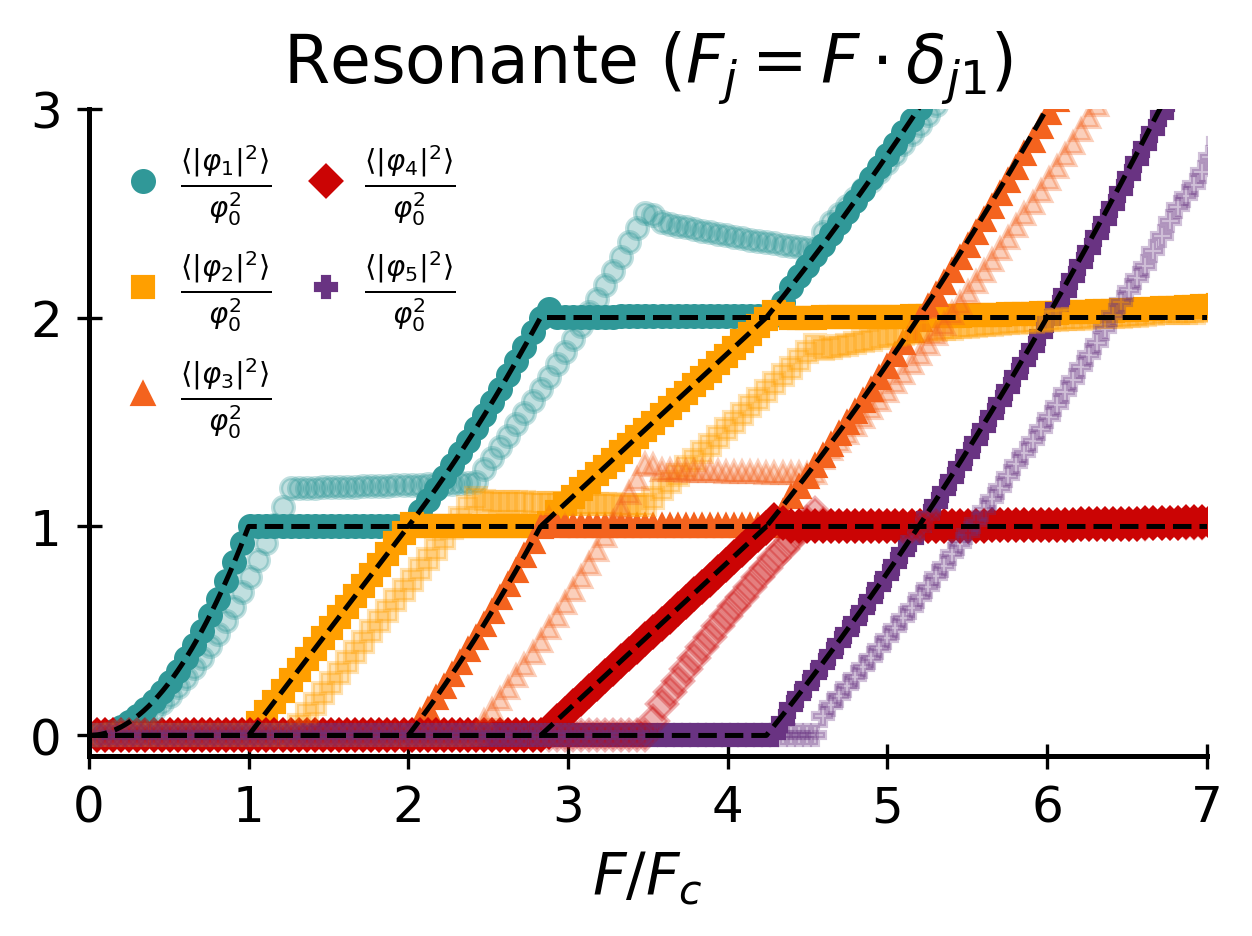

In [ ]:
data_directory = '../../data/processed/'
barrido = pd.read_csv(data_directory + 'cascada_resonante_nodetuning.dat', delimiter = '\t', header = None)
barrido_detuning =  pd.read_csv(data_directory + 'cascada_resonante_detuning1.dat', delimiter = '\t', header = None)

n = 5
potencia_barrido = barrido.iloc[:, 0]
sitios_barrido = barrido.iloc[:, 1:1+n]
posicion_barrido = barrido.iloc[:, 1+n:2*n] 
velocidad_barrido = barrido.iloc[:, 2*n:3*n-1]
gamma = 0.1
g = 3e-4
Gamma = 0.0025
labels= [r'$\frac{\langle \vert \varphi_1\vert^2 \rangle}{\varphi_0^2}$', r'$\frac{\langle \vert \varphi_2\vert^2 \rangle}{\varphi_0^2}$', r'$\frac{\langle \vert \varphi_3\vert^2 \rangle }{\varphi_0^2}$', r'$\frac{\langle \vert \varphi_4\vert^2 \rangle }{\varphi_0^2}$', r'$\frac{\langle \vert \varphi_5\vert^2 \rangle }{\varphi_0^2}$', r'$\frac{\langle x_1 \rangle ^2}{\varphi_0^2}$']
A_0 = gamma / (2*g)
phi_0_2 = Gamma * gamma / (4*g**2)
F_c = np.sqrt(phi_0_2)* (gamma / 2)
phi_barrido =np.array( [np.sqrt(sitios_barrido[col].to_numpy(dtype = float)) for col in sitios_barrido.columns.tolist()])**2/phi_0_2
x_barrido = np.array([np.sqrt(posicion_barrido[col].to_numpy(dtype = float)) for col in posicion_barrido.columns.tolist()])/A_0
v_barrido = np.array([np.sqrt(velocidad_barrido[col].to_numpy(dtype = float)) for col in velocidad_barrido.columns.tolist()])/(A_0 * Gamma)
P_barrido = (potencia_barrido.to_numpy(dtype = float))


potencia_barrido_detuning = barrido_detuning.iloc[:, 0]
sitios_barrido_detuning = barrido_detuning.iloc[:, 1:1+n]
posicion_barrido_detuning = barrido_detuning.iloc[:, 1+n:2*n] 
velocidad_barrido_detuning = barrido_detuning.iloc[:, 2*n:3*n-1]

phi_barrido_detuning =np.array( [np.sqrt(sitios_barrido_detuning[col].to_numpy(dtype = float)) for col in sitios_barrido_detuning.columns.tolist()])**2/phi_0_2
x_barrido_detuning = np.array([np.sqrt(posicion_barrido_detuning[col].to_numpy(dtype = float)) for col in posicion_barrido_detuning.columns.tolist()])/A_0
v_barrido_detuning = np.array([np.sqrt(velocidad_barrido_detuning[col].to_numpy(dtype = float)) for col in velocidad_barrido_detuning.columns.tolist()])/(A_0 * Gamma)


fc = [0, 1, 2, 2*np.sqrt(2), 3*np.sqrt(2)]
f1 = np.linspace(fc[0], fc[1], 100)
f2 = np.linspace(fc[1], fc[2], 100)
f3 = np.linspace(fc[2], fc[3], 100)
f4 = np.linspace(fc[3], fc[4], 100)

fphi1 = np.linspace(fc[4], max(P_barrido), 100)
fphi2 = np.linspace(fc[4], max(P_barrido), 100)
fphi3 = np.linspace(fc[4], max(P_barrido), 100)
fphi4 = np.linspace(fc[4], max(P_barrido), 100)
fphi5 = np.linspace(fc[4], max(P_barrido), 100)


fphi = [fphi1, fphi2, fphi3, fphi4, fphi5]
phi1_t = np.concatenate((f1**2, np.ones(100), (f3/2)**2, 2*np.ones(100),(fphi1/3)**2), axis = 0)
phi2_t = np.concatenate((np.zeros(100), f2-1, np.ones(100), f4/np.sqrt(2) -1,2*np.ones(100)), axis = 0)
phi3_t = np.concatenate((np.zeros(100), np.zeros(100), (f3/2)**2 -1, np.ones(100),(fphi3/3)**2 - 1), axis = 0)
phi4_t = np.concatenate((np.zeros(100), np.zeros(100), np.zeros(100), f4/np.sqrt(2) -2,np.ones(100)), axis = 0)
phi5_t = np.concatenate((np.zeros(100), np.zeros(100), np.zeros(100), np.zeros(100),(fphi5/3)**2 -2), axis = 0)
phi_teo = [phi1_t, phi2_t, phi3_t, phi4_t, phi5_t]
force_array = np.concatenate((f1, f2, f3, f4), axis = 0)
fig, ax = plt.subplots()

# --- Plot data points (markers with color/marker cycle) ---

for phi, phi_label, phi_detuned in zip(phi_barrido, labels, phi_barrido_detuning):
    ax.plot(P_barrido, phi, linestyle="", label=phi_label)  # marker-only plot

for phi_detuned in phi_barrido_detuning:
    ax.plot(P_barrido, phi_detuned, linestyle="", alpha = 0.3)  # marker-only plot
# --- Plot model dashed lines (thin black) ---
for phit, f in zip(phi_teo, fphi):
    
    plt.plot(np.concatenate((force_array, f), axis=0),
            phit,
            linestyle="--",
            marker='',
            color="black",
            linewidth=1.2)
    

ax.legend(
    loc= 'best',
    fontsize=10, 
    markerscale=1, 
    handlelength=1.0, 
    handletextpad=0.4, 
    borderpad=0.3, 
    frameon=False,
    ncol =2,
    columnspacing= 0.8
)  # Enlarge legend markers

ax.set_xlim([0, 7])
ax.set_ylim([-0.1, 3])
ax.set_xlabel(r"$F/F_c$")
# ax.set_ylabel(r"$\phi^2 / \phi_0^2$")
ax.set_title(r"Resonante ($F_j = F\cdot \delta_{j1}$)")
plt.tight_layout(pad=0.2)
plt.savefig('cascada_resonante.png')
plt.show()

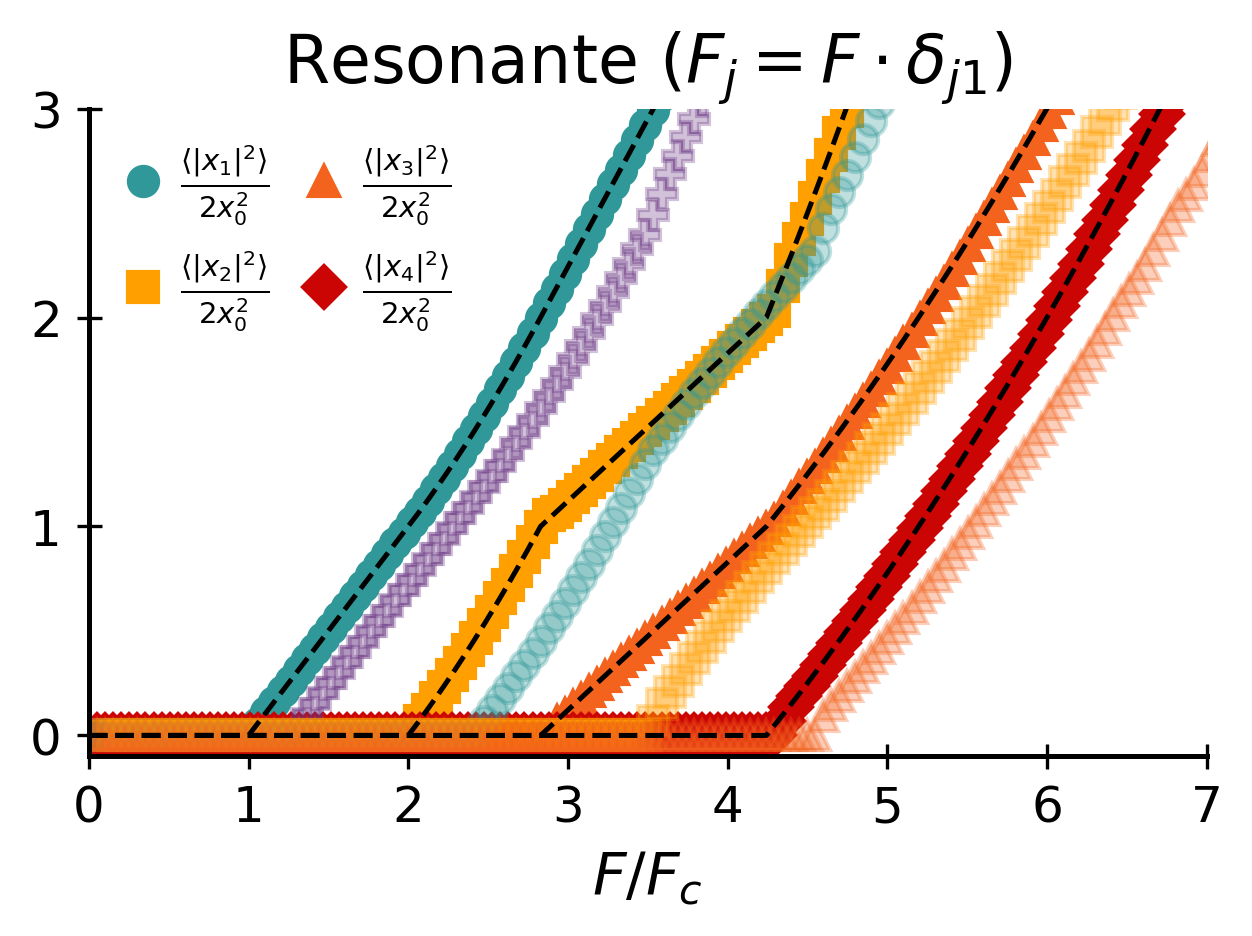

In [ ]:
# barrido = pd.read_csv(data_directory + 'cascada_resonante_nodetuning.dat', delimiter = '\t', header = None)
# barrido_detuning =  pd.read_csv(data_directory + 'cascada_resonante_detuning1.dat', delimiter = '\t', header = None)

# n = 5
# potencia_barrido = barrido.iloc[:, 0]
# sitios_barrido = barrido.iloc[:, 1:1+n]
# posicion_barrido = barrido.iloc[:, 1+n:2*n] 
# velocidad_barrido = barrido.iloc[:, 2*n:3*n-1]
# gamma = 0.1
# g = 3e-4
# Gamma = 0.0025
x_labels= [r'$\frac{\langle \vert x_1\vert^2 \rangle}{2 x_0^2}$', r'$\frac{\langle \vert x_2\vert^2 \rangle}{2x_0^2}$', r'$\frac{\langle \vert x_3\vert^2 \rangle }{2x_0^2}$', r'$\frac{\langle \vert x_4\vert^2 \rangle }{2x_0^2}$', r'$\frac{\langle \vert x_5\vert^2 \rangle }{2x_0^2}$', r'$\frac{\langle x_1 \rangle ^2}{2x_0^2}$']
# A_0 = gamma / (2*g)
# phi_0_2 = Gamma * gamma / (4*g**2)
# F_c = np.sqrt(phi_0_2)* (gamma / 2)
# phi_barrido =np.array( [np.sqrt(sitios_barrido[col].to_numpy(dtype = float)) for col in sitios_barrido.columns.tolist()])**2/phi_0_2
# x_barrido = np.array([np.sqrt(posicion_barrido[col].to_numpy(dtype = float)) for col in posicion_barrido.columns.tolist()])/A_0
# v_barrido = np.array([np.sqrt(velocidad_barrido[col].to_numpy(dtype = float)) for col in velocidad_barrido.columns.tolist()])/(A_0 * Gamma)
# P_barrido = (potencia_barrido.to_numpy(dtype = float))


# potencia_barrido_detuning = barrido_detuning.iloc[:, 0]
# sitios_barrido_detuning = barrido_detuning.iloc[:, 1:1+n]
# posicion_barrido_detuning = barrido_detuning.iloc[:, 1+n:2*n] 
# velocidad_barrido_detuning = barrido_detuning.iloc[:, 2*n:3*n-1]

# phi_barrido_detuning =np.array( [np.sqrt(sitios_barrido_detuning[col].to_numpy(dtype = float)) for col in sitios_barrido_detuning.columns.tolist()])**2/phi_0_2
# x_barrido_detuning = np.array([np.sqrt(posicion_barrido_detuning[col].to_numpy(dtype = float)) for col in posicion_barrido_detuning.columns.tolist()])/A_0
# v_barrido_detuning = np.array([np.sqrt(velocidad_barrido_detuning[col].to_numpy(dtype = float)) for col in velocidad_barrido_detuning.columns.tolist()])/(A_0 * Gamma)


# fc = [0, 1, 2, 2*np.sqrt(2), 3*np.sqrt(2)]
# f1 = np.linspace(fc[0], fc[1], 100)
# f2 = np.linspace(fc[1], fc[2], 100)
# f3 = np.linspace(fc[2], fc[3], 100)
# f4 = np.linspace(fc[3], fc[4], 100)

# fphi1 = np.linspace(fc[4], 5.2, 100)
# fphi2 = np.linspace(fc[4], 7, 100)
# fphi3 = np.linspace(fc[4], 6, 100)
# fphi4 = np.linspace(fc[4], 7, 100)
# fphi5 = np.linspace(fc[4], 6.8, 100)
# fphi = [fphi1, fphi2, fphi3, fphi4, fphi5]
fx = [fphi2, fphi3, fphi4, fphi4]
# phi1_t = np.concatenate((f1**2, np.ones(100), (f3/2)**2, 2*np.ones(100),(fphi1/3)**2), axis = 0)
# phi2_t = np.concatenate((np.zeros(100), f2-1, np.ones(100), f4/np.sqrt(2) -1,2*np.ones(100)), axis = 0)
# phi3_t = np.concatenate((np.zeros(100), np.zeros(100), (f3/2)**2 -1, np.ones(100),(fphi3/3)**2 - 1), axis = 0)
# phi4_t = np.concatenate((np.zeros(100), np.zeros(100), np.zeros(100), f4/np.sqrt(2) -2,np.ones(100)), axis = 0)
# phi5_t = np.concatenate((np.zeros(100), np.zeros(100), np.zeros(100), np.zeros(100),(fphi5/3)**2 -2), axis = 0)
# phi_teo = [phi1_t, phi2_t, phi3_t, phi4_t, phi5_t]
x1_t = phi1_t * phi2_t
x2_t = phi2_t * phi3_t
x3_t = phi3_t * phi4_t
x4_t = phi4_t * phi5_t
x_teo = [x1_t, x2_t, x3_t, x4_t]
# force_array = np.concatenate((f1, f2, f3, f4), axis = 0)
fig, ax = plt.subplots()

# --- Plot data points (markers with color/marker cycle) ---

for x, x_label, x_detuned in zip(x_barrido, x_labels, x_barrido_detuning):
    ax.plot(P_barrido, x**2/2, linestyle="", label=x_label)  # marker-only plot

for x_detuned in x_barrido_detuning:
    ax.plot(P_barrido, x_detuned**2/2, linestyle="", alpha = 0.3)  # marker-only plot
# --- Plot model dashed lines (thin black) ---
ax2.set_prop_cycle(plt.rcParams['axes.prop_cycle'])
for xt, f in zip(x_teo, fx):
    
    plt.plot(np.concatenate((force_array, f), axis=0),
            xt,
            linestyle="--",
            marker='',
            color="black",
            linewidth=1.2)
    

ax.legend(
    loc= 'best',
    fontsize=10, 
    markerscale=1, 
    handlelength=1.0, 
    handletextpad=0.4, 
    borderpad=0.3, 
    frameon=False,
    ncol =2,
    columnspacing= 0.8
)  # Enlarge legend markers

ax.set_xlim([0, 7])
ax.set_ylim([-0.1, 3])
ax.set_xlabel(r"$F/F_c$")
# ax.set_ylabel(r"$\phi^2 / \phi_0^2$")
ax.set_title(r"Resonante ($F_j = F\cdot \delta_{j1}$)")
plt.tight_layout(pad=0.2)
plt.savefig('cascada_resonante_fonones.png')
plt.show()

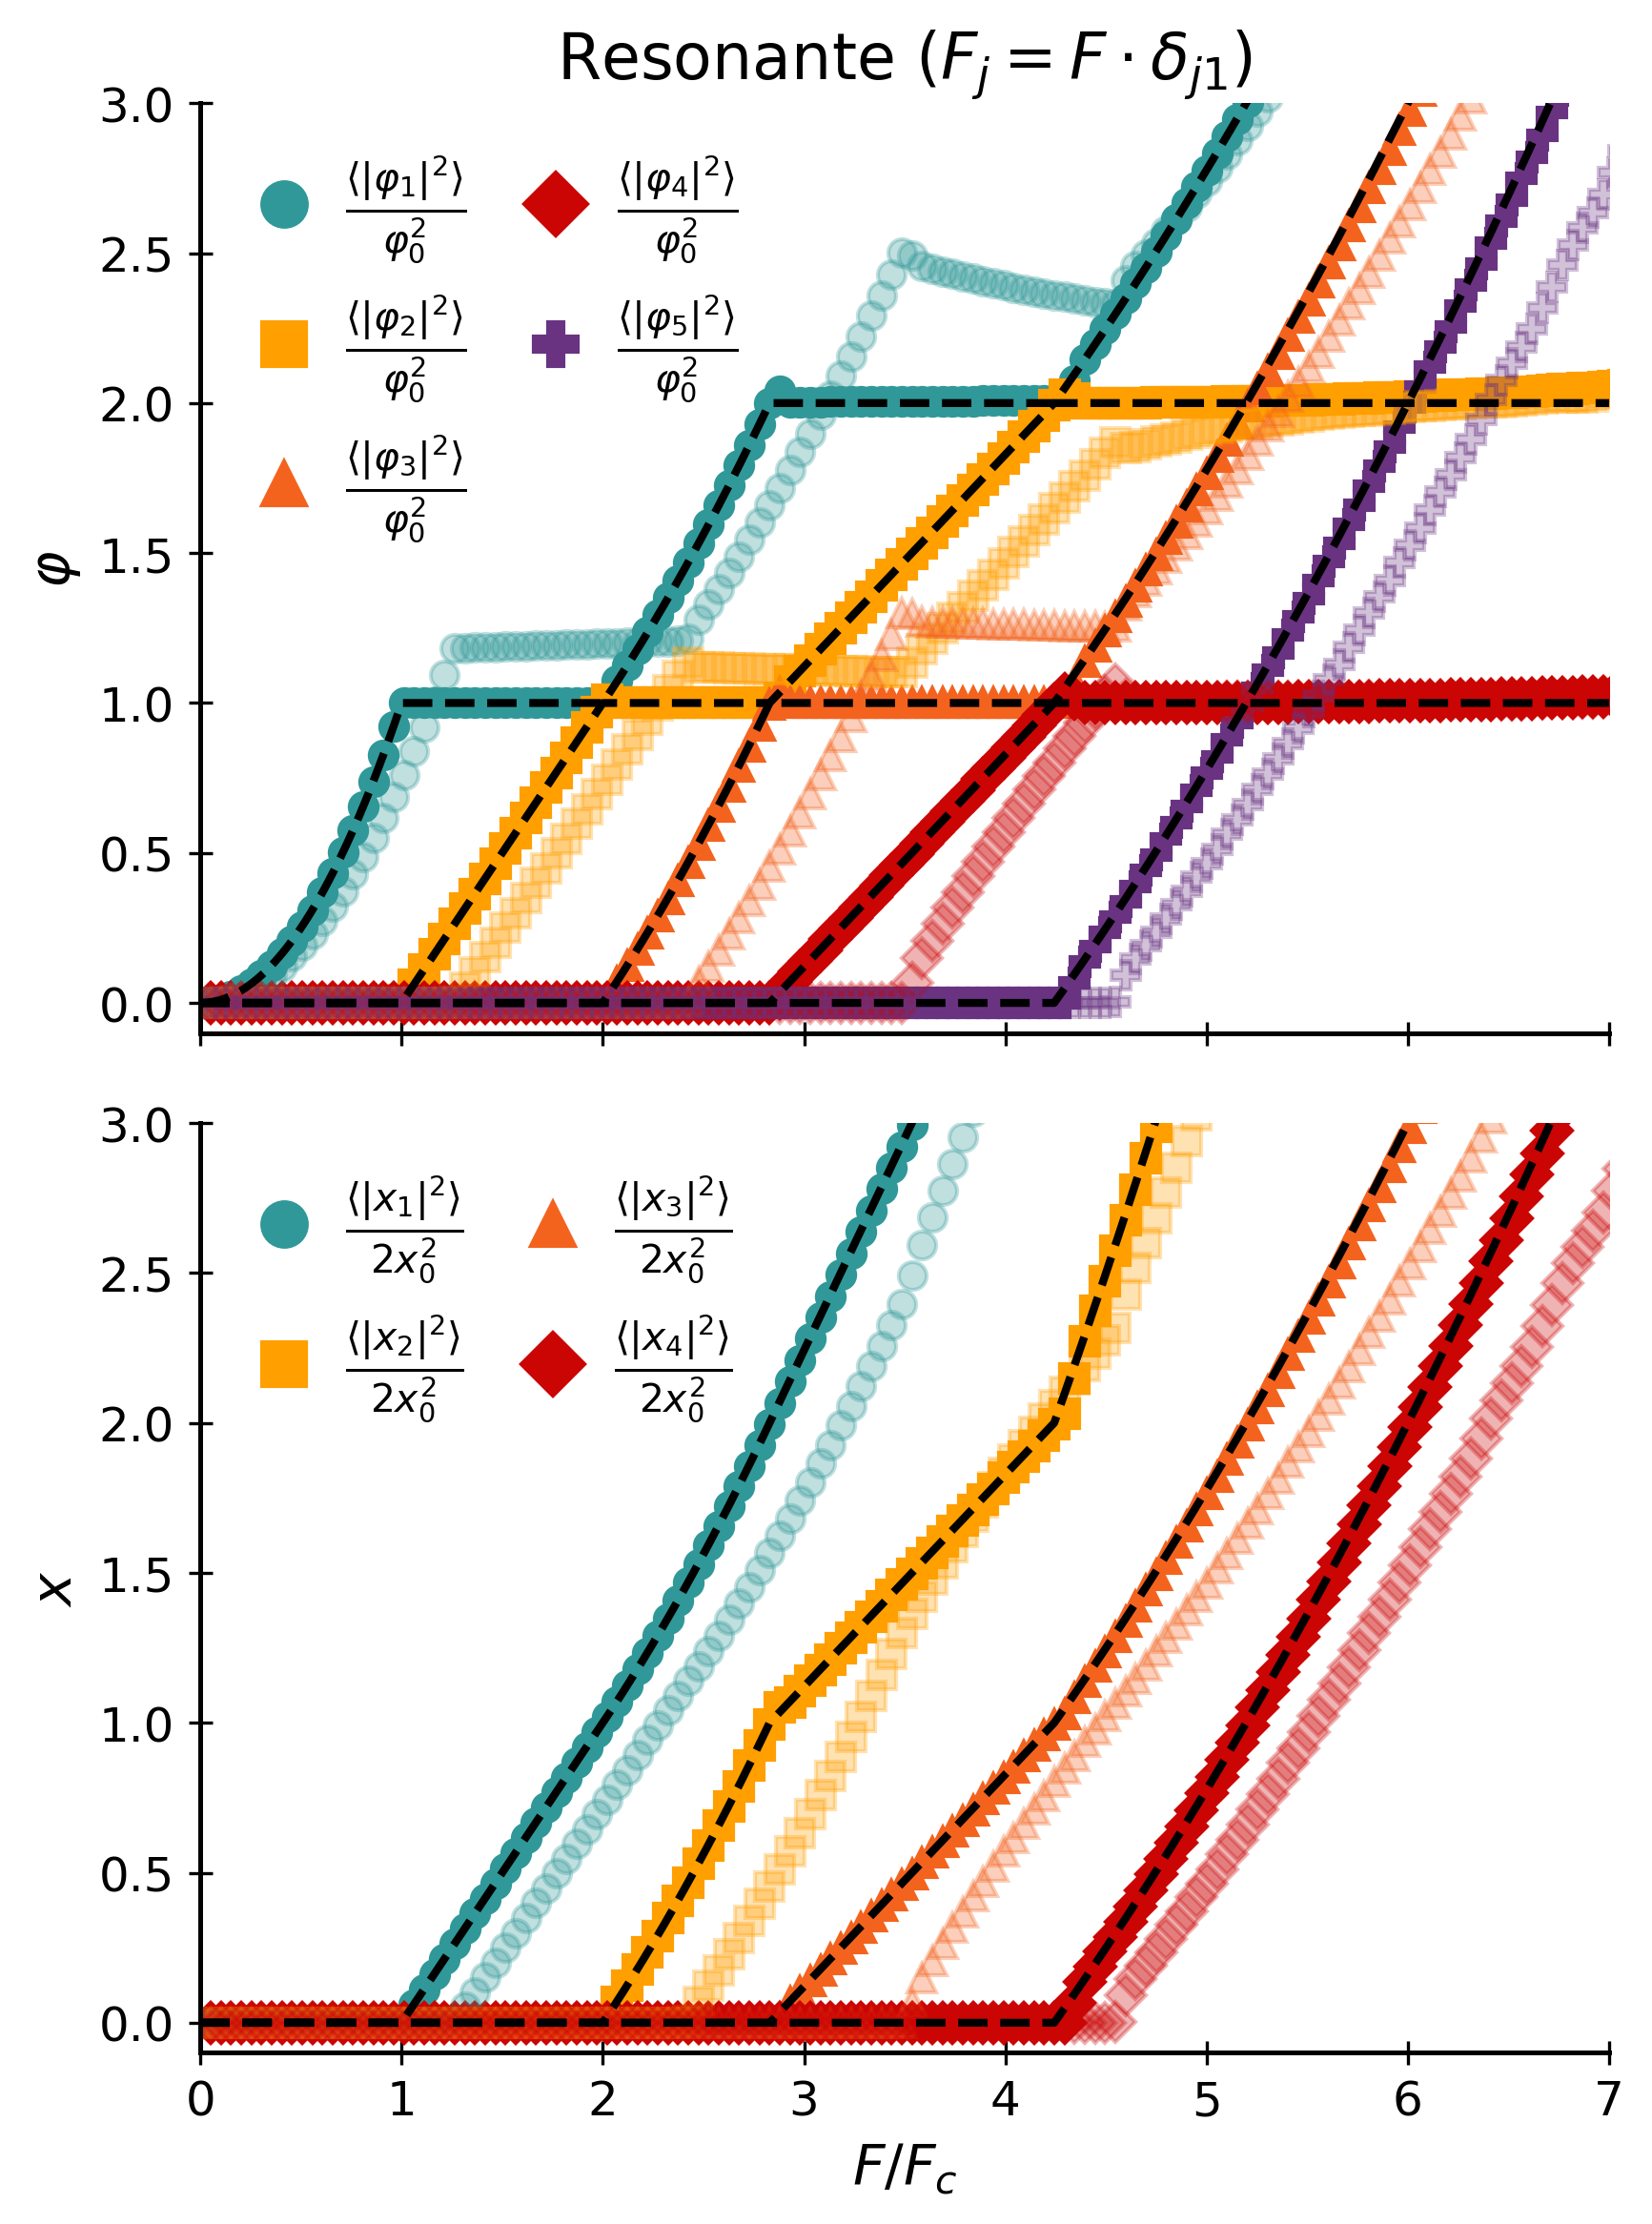

In [38]:
from itertools import cycle

# get what you defined in rcParams
prop = plt.rcParams['axes.prop_cycle'].by_key()
colors = prop.get('color', [])
markers = prop.get('marker', [None] * len(colors))

color_cycle = cycle(colors)
marker_cycle = cycle(markers)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))

# =======================
# --- Top subplot: photons (phi) ---
# =======================
for phi, phi_label, phi_detuned in zip(phi_barrido, labels, phi_barrido_detuning):
    ax1.plot(P_barrido, phi, linestyle="", label=phi_label)  # scatter (default marker)

for phi_detuned in phi_barrido_detuning:
    ax1.plot(P_barrido, phi_detuned, linestyle="", alpha=0.3)  # faint scatter

for phit, f in zip(phi_teo, fphi):
    ax1.plot(np.concatenate((force_array, f), axis=0),
             phit,
             linestyle="--", marker="",
             color="black", linewidth=2)

ax1.set_xlim([0, 7])
ax1.set_ylim([-0.1, 3])
ax1.set_ylabel(r"$\varphi$")
ax1.set_title(r"Resonante ($F_j = F\cdot \delta_{j1}$)")

ax1.legend(
    loc='best',
    fontsize=14,          # bigger text
    markerscale=1.6,      # bigger markers in legend
    handlelength=1.2, 
    handletextpad=0.5, 
    borderpad=0.4, 
    frameon=False,
    ncol=2,
    columnspacing=1.0
)

# =======================
# --- Bottom subplot: phonons (x) ---
# =======================
# plot main (opaque) curves using explicit color+marker
for x, x_label in zip(x_barrido, x_labels):
    c = next(color_cycle)
    m = next(marker_cycle)
    ax2.plot(P_barrido, x**2/2, linestyle="", marker=m, color=c, label=x_label)

# reset the cycles to start at the same first color/marker
color_cycle = cycle(colors)
marker_cycle = cycle(markers)

# plot detuned (transparent) curves using the same color+marker sequence
for x_detuned in x_barrido_detuning:
    c = next(color_cycle)
    m = next(marker_cycle)
    ax2.plot(P_barrido, x_detuned**2/2, linestyle="", marker=m, color=c, alpha=0.3)

ax2.set_prop_cycle(plt.rcParams['axes.prop_cycle'])
for xt, f in zip(x_teo, fx):
    ax2.plot(np.concatenate((force_array, f), axis=0),
             xt,
             linestyle="--", marker="",
             color="black", linewidth=2)

ax2.set_xlim([0, 7])
ax2.set_ylim([-0.1, 3])
ax2.set_xlabel(r"$F/F_c$")
ax2.set_ylabel(r"$x$")

ax2.legend(
    loc='best',
    fontsize=14,          # bigger text
    markerscale=1.6,      # bigger markers in legend
    handlelength=1.2, 
    handletextpad=0.5, 
    borderpad=0.4, 
    frameon=False,
    ncol=2,
    columnspacing=1.0
)

# =======================
# --- Layout & save ---
# =======================
plt.tight_layout()
plt.savefig('cascada_resonante_combined.png', dpi=300)
plt.show()


In [ ]:
datos_overpowered = pd.read_csv(data_directory + 'mapa_bistability_new.dat', delimiter = '\t', header = None)

In [52]:
fuerza_overpowered = datos_overpowered[0].to_numpy(dtype = float)
phi1_overpowered= datos_overpowered[2].to_numpy(dtype = float)
phi2_overpowered = datos_overpowered[3].to_numpy(dtype= float)
x_overpowered = datos_overpowered[4].to_numpy(dtype = float)/2


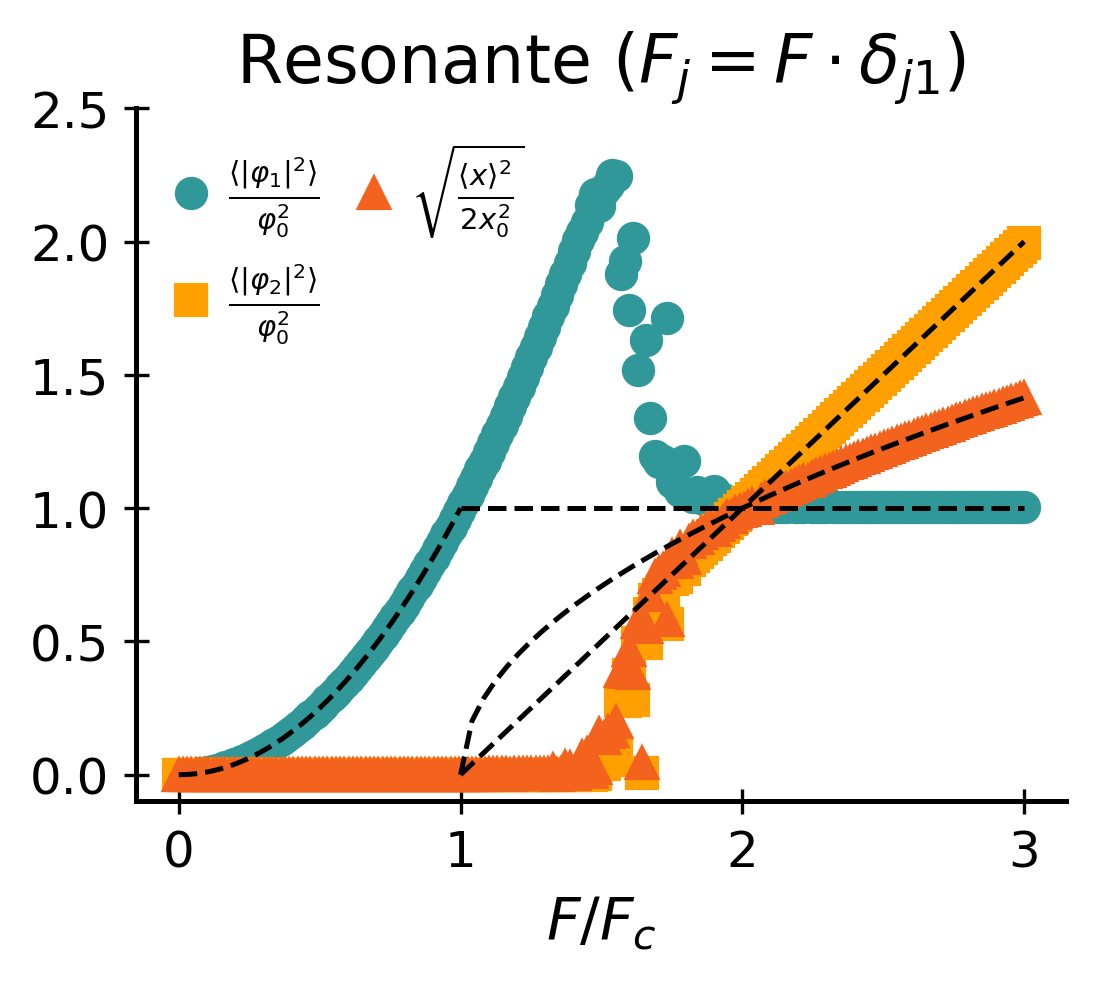

In [66]:
fig, ax = plt.subplots()

# --- Plot data points (markers with color/marker cycle) ---
ax.plot(fuerza_overpowered, phi1_overpowered, linestyle="", label=r'$\frac{\langle \vert \varphi_1\vert^2 \rangle}{\varphi_0^2}$')  # marker-only plot
ax.plot(fuerza_overpowered, phi2_overpowered, linestyle="", label=r'$\frac{\langle \vert \varphi_2\vert^2 \rangle}{\varphi_0^2}$')  # marker-only plot
ax.plot(fuerza_overpowered, np.sqrt(x_overpowered), linestyle="", label=r'$\sqrt{\frac{\langle x \rangle ^2}{2x_0^2}}$')  # marker-only plot
f_1 = np.linspace(0,1)
f_2 = np.linspace(1, 3)
plt.plot(f_1,
            f_1**2,
            linestyle="--",
            marker='',
            color="black",
            linewidth=1.2)
plt.plot(f_2,
            np.sqrt(f_2-1),
            linestyle="--",
            marker='',
            color="black",
            linewidth=1.2)    
plt.plot(f_2,
            f_2-1,
            linestyle="--",
            marker='',
            color="black",
            linewidth=1.2) 
plt.plot(f_2,
            np.ones(len(f_2)),
            linestyle="--",
            marker='',
            color="black",
            linewidth=1.2)    
ax.legend(
    loc= 'best',
    fontsize=10, 
    markerscale=1, 
    handlelength=1.0, 
    handletextpad=0.4, 
    borderpad=0.3, 
    frameon=False,
    ncol =2,
    columnspacing= 0.8
)  # Enlarge legend markers

# ax.set_xlim([0, 7])
ax.set_ylim([-0.1, 2.5])
ax.set_xlabel(r"$F/F_c$")
# ax.set_ylabel(r"$\phi^2 / \phi_0^2$")
ax.set_title(r"Resonante ($F_j = F\cdot \delta_{j1}$)")
# plt.tight_layout(pad=0.2)
plt.savefig('twoSiteBistability.png')
plt.show()

In [ ]:
datos_fourier = pd.read_csv(data_directory + 'mapa_fourier_finally.dat', header = None, delimiter= '\t')
datos_paradigma = pd.read_csv(data_directory + 'output_paradigma.dat', header=  None, delimiter= '\t')

In [68]:
P_fourier = datos_fourier[0].to_numpy(dtype = float)
phi1_freq = datos_fourier[2].to_numpy(dtype = float)
phi2_freq = datos_fourier[3].to_numpy(dtype = float)
x_freq = datos_fourier[4].to_numpy(dtype = float)

phi1_fourier = datos_fourier[5].to_numpy(dtype = complex)
phi2_fourier = datos_fourier[6].to_numpy(dtype = complex)
x_fourier = datos_fourier[7].to_numpy(dtype = complex)



P_paradigma = datos_paradigma[0].to_numpy(dtype = float)
phi1_paradigma = datos_paradigma[1].to_numpy(dtype = float)
phi2_paradigma = datos_paradigma[2].to_numpy(dtype = float)
x_paradigma = datos_paradigma[3].to_numpy(dtype = float)
n_paradigma = datos_paradigma[5].to_numpy(dtype=float)
g = 8e-4; 
gamma = 0.1; 
Gamma = 0.0025; 
Omega = 1.0; # solo importa que los niveles tengan la separacion dada por este tipo
omega_2 = 1.0; 
omega_1 = omega_2 + Omega;
J0 = 0.0;
R = 1;  # acoplar bien el primer sitio con el reservorio
gamma_r = 30;# hace que el reservorio se clave rapido en su valor estacionario si es grande
P_th = gamma * gamma_r / R
# P = np.linspace(1e-3, 5, 19)[8]*P_th
A0 = gamma /(2*g)
P0 = P_th+ Gamma * A0**2
phi0 = gamma * Gamma / (4*g**2)
n0 = gamma/R

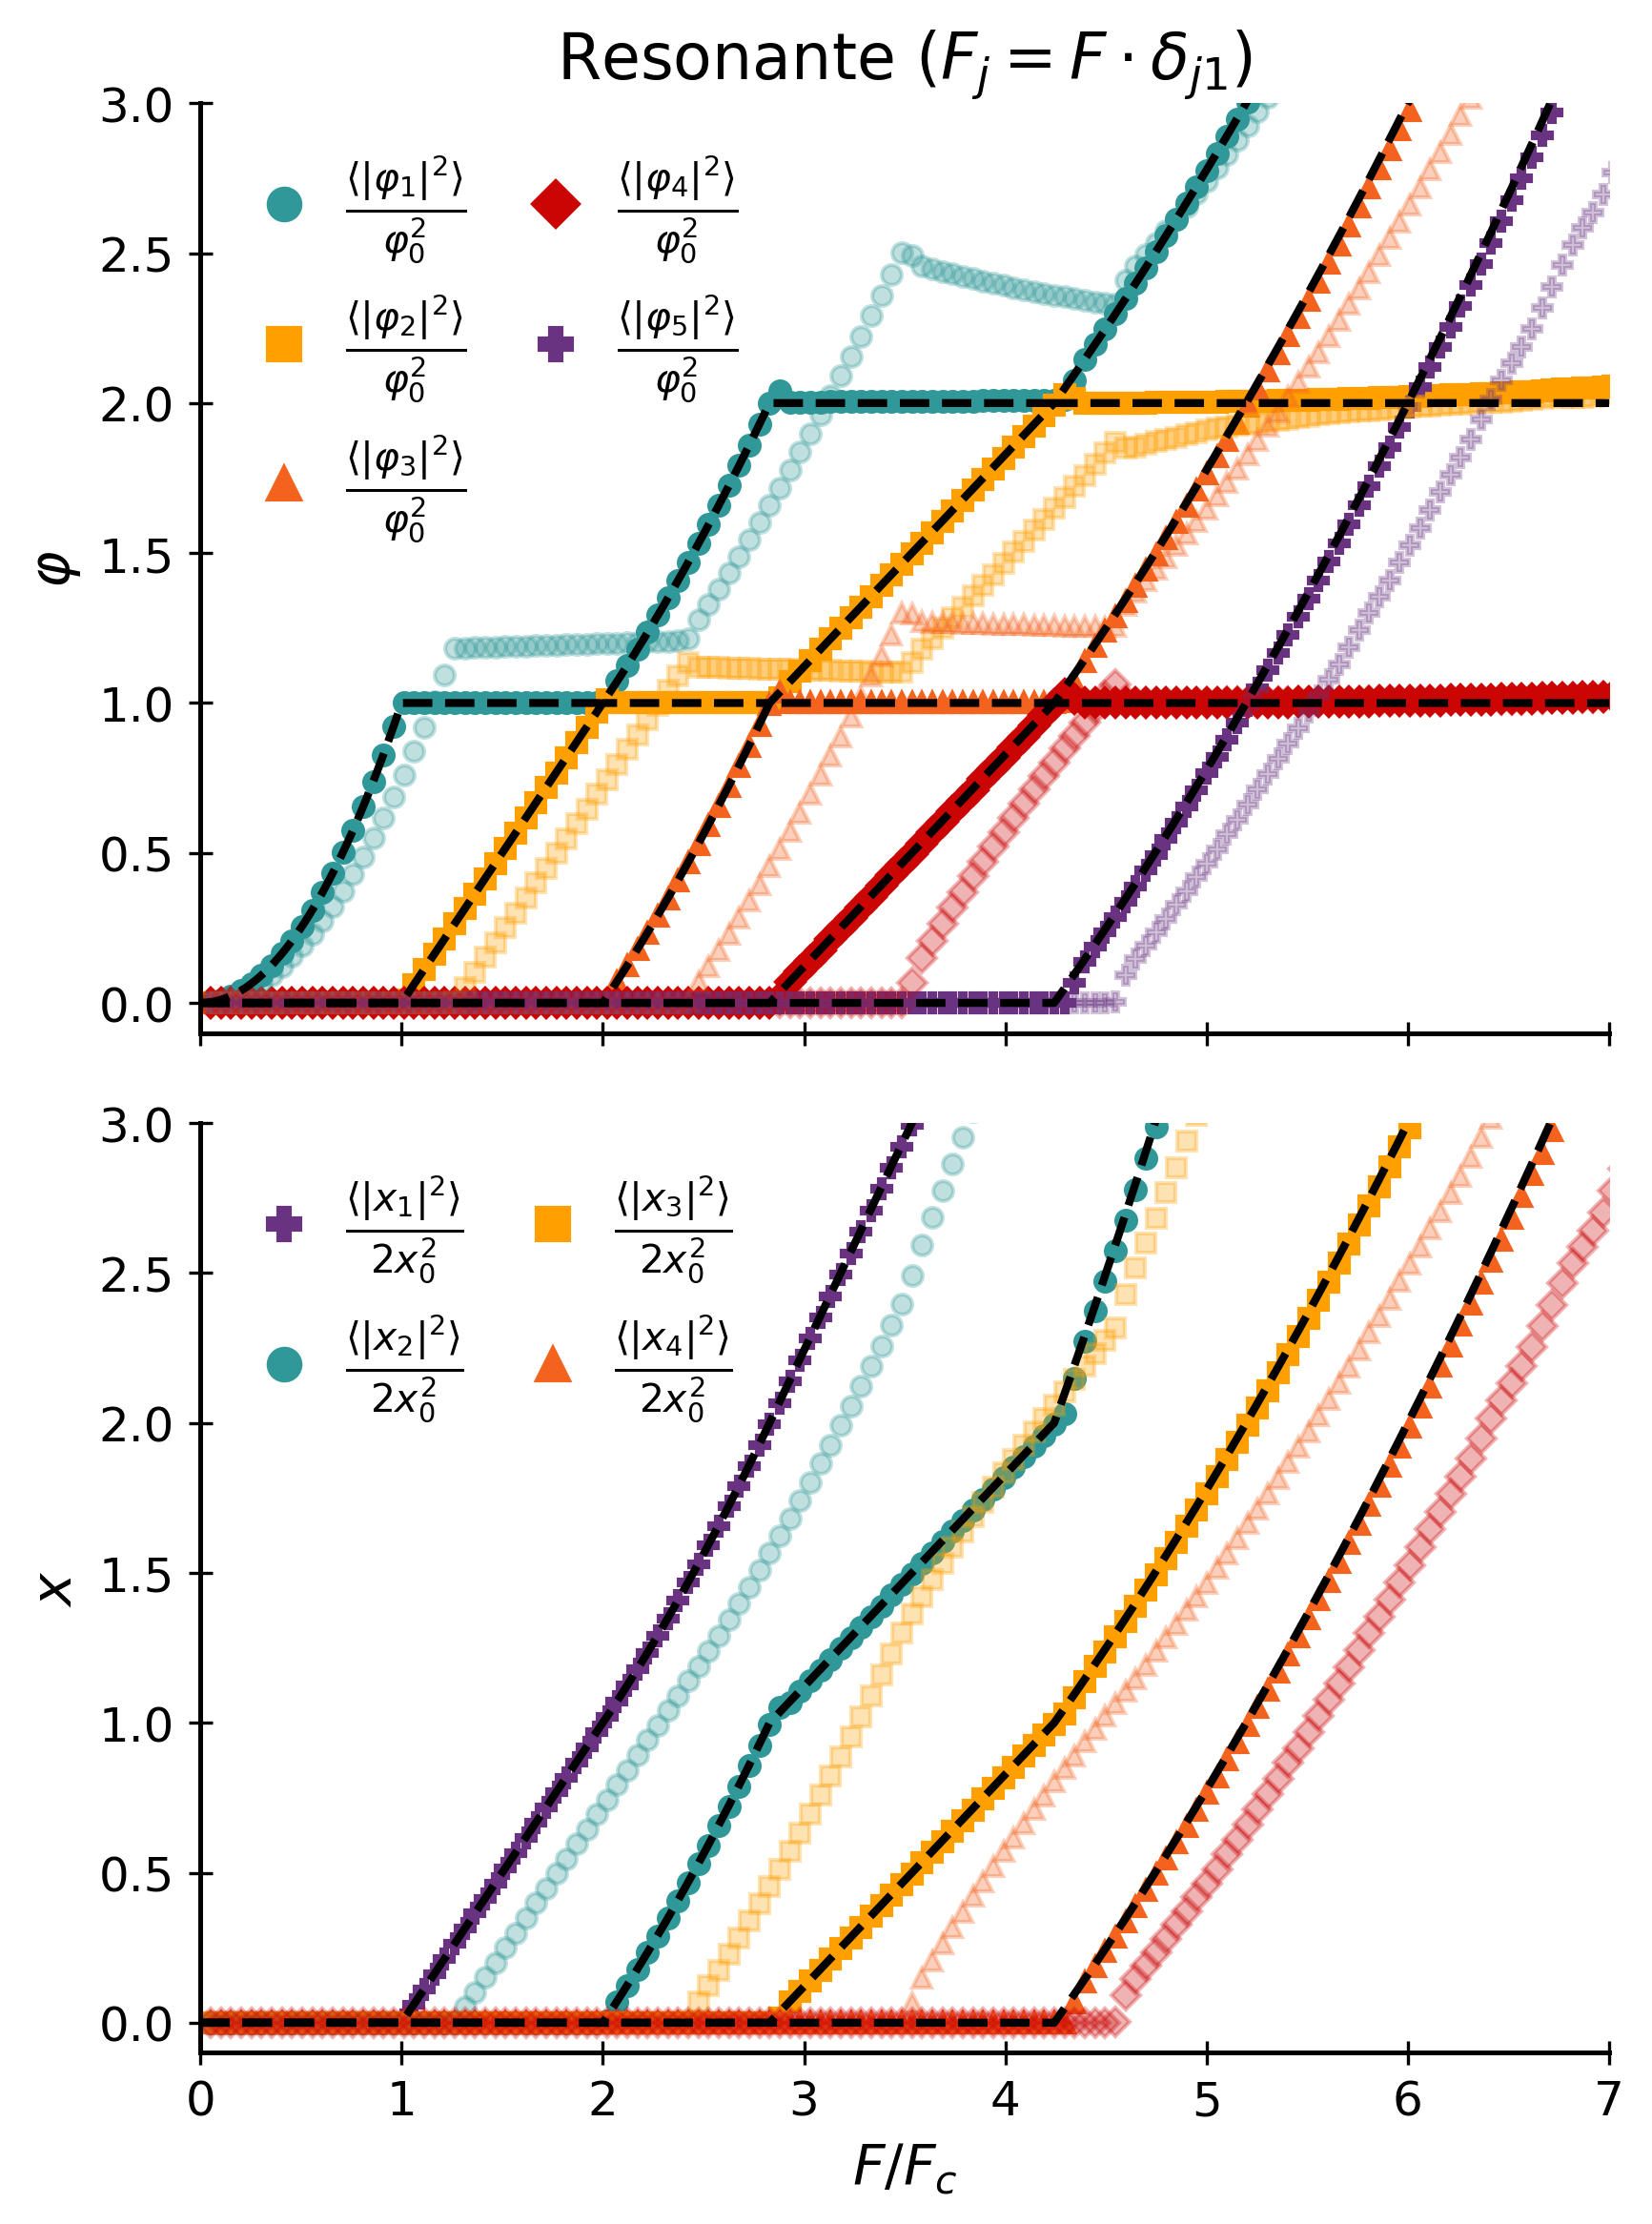

In [96]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
plt.rcParams.update({
    "figure.figsize": (4, 3),         # Compact figure
    "figure.dpi": 300,                # High resolution for posters
    "font.size": 14,                  # Larger text
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "lines.linewidth": 2.5,           # Thicker lines
    "lines.markersize": 5,            # Larger markers
    "axes.spines.top": False,         # Clean up frame
    "axes.spines.right": False,
    "axes.linewidth": 1.2,
    "xtick.major.size": 6,            # Larger ticks
    "ytick.major.size": 6,
    "xtick.direction": "inout",       # Compact but readable ticks
    "ytick.direction": "inout",
    "legend.frameon": False           # Cleaner legend
})
# =======================
# --- Top subplot: photons (phi) ---
# =======================
for phi, phi_label, phi_detuned in zip(phi_barrido, labels, phi_barrido_detuning):
    ax1.plot(P_barrido, phi, linestyle="", label=phi_label)  # scatter (default marker)

for phi_detuned in phi_barrido_detuning:
    ax1.plot(P_barrido, phi_detuned, linestyle="", alpha=0.3)  # faint scatter

for phit, f in zip(phi_teo, fphi):
    ax1.plot(np.concatenate((force_array, f), axis=0),
             phit,
             linestyle="--", marker="",
             color="black", linewidth=2)

ax1.set_xlim([0, 7])
ax1.set_ylim([-0.1, 3])
ax1.set_ylabel(r"$\varphi$")
ax1.set_title(r"Resonante ($F_j = F\cdot \delta_{j1}$)")

ax1.legend(
    loc='best',
    fontsize=14,          # bigger text
    markerscale=1.6,      # bigger markers in legend
    handlelength=1.2, 
    handletextpad=0.5, 
    borderpad=0.4, 
    frameon=False,
    ncol=2,
    columnspacing=1.0
)

# =======================
# --- Bottom subplot: phonons (x) ---
# =======================
# plot main (opaque) curves using explicit color+marker
for x, x_label in zip(x_barrido, x_labels):
    c = next(color_cycle)
    m = next(marker_cycle)
    ax2.plot(P_barrido, x**2/2, linestyle="", marker=m, color=c, label=x_label)

# reset the cycles to start at the same first color/marker
color_cycle = cycle(colors)
marker_cycle = cycle(markers)

# plot detuned (transparent) curves using the same color+marker sequence
for x_detuned in x_barrido_detuning:
    c = next(color_cycle)
    m = next(marker_cycle)
    ax2.plot(P_barrido, x_detuned**2/2, linestyle="", marker=m, color=c, alpha=0.3)

ax2.set_prop_cycle(plt.rcParams['axes.prop_cycle'])
for xt, f in zip(x_teo, fx):
    ax2.plot(np.concatenate((force_array, f), axis=0),
             xt,
             linestyle="--", marker="",
             color="black", linewidth=2)

ax2.set_xlim([0, 7])
ax2.set_ylim([-0.1, 3])
ax2.set_xlabel(r"$F/F_c$")
ax2.set_ylabel(r"$x$")

ax2.legend(
    loc='best',
    fontsize=14,          # bigger text
    markerscale=1.6,      # bigger markers in legend
    handlelength=1.2, 
    handletextpad=0.5, 
    borderpad=0.4, 
    frameon=False,
    ncol=2,
    columnspacing=1.0
)

# =======================
# --- Layout & save ---
# =======================
plt.tight_layout()
# plt.savefig('cascada_resonante_combined.png', dpi=300)
plt.show()


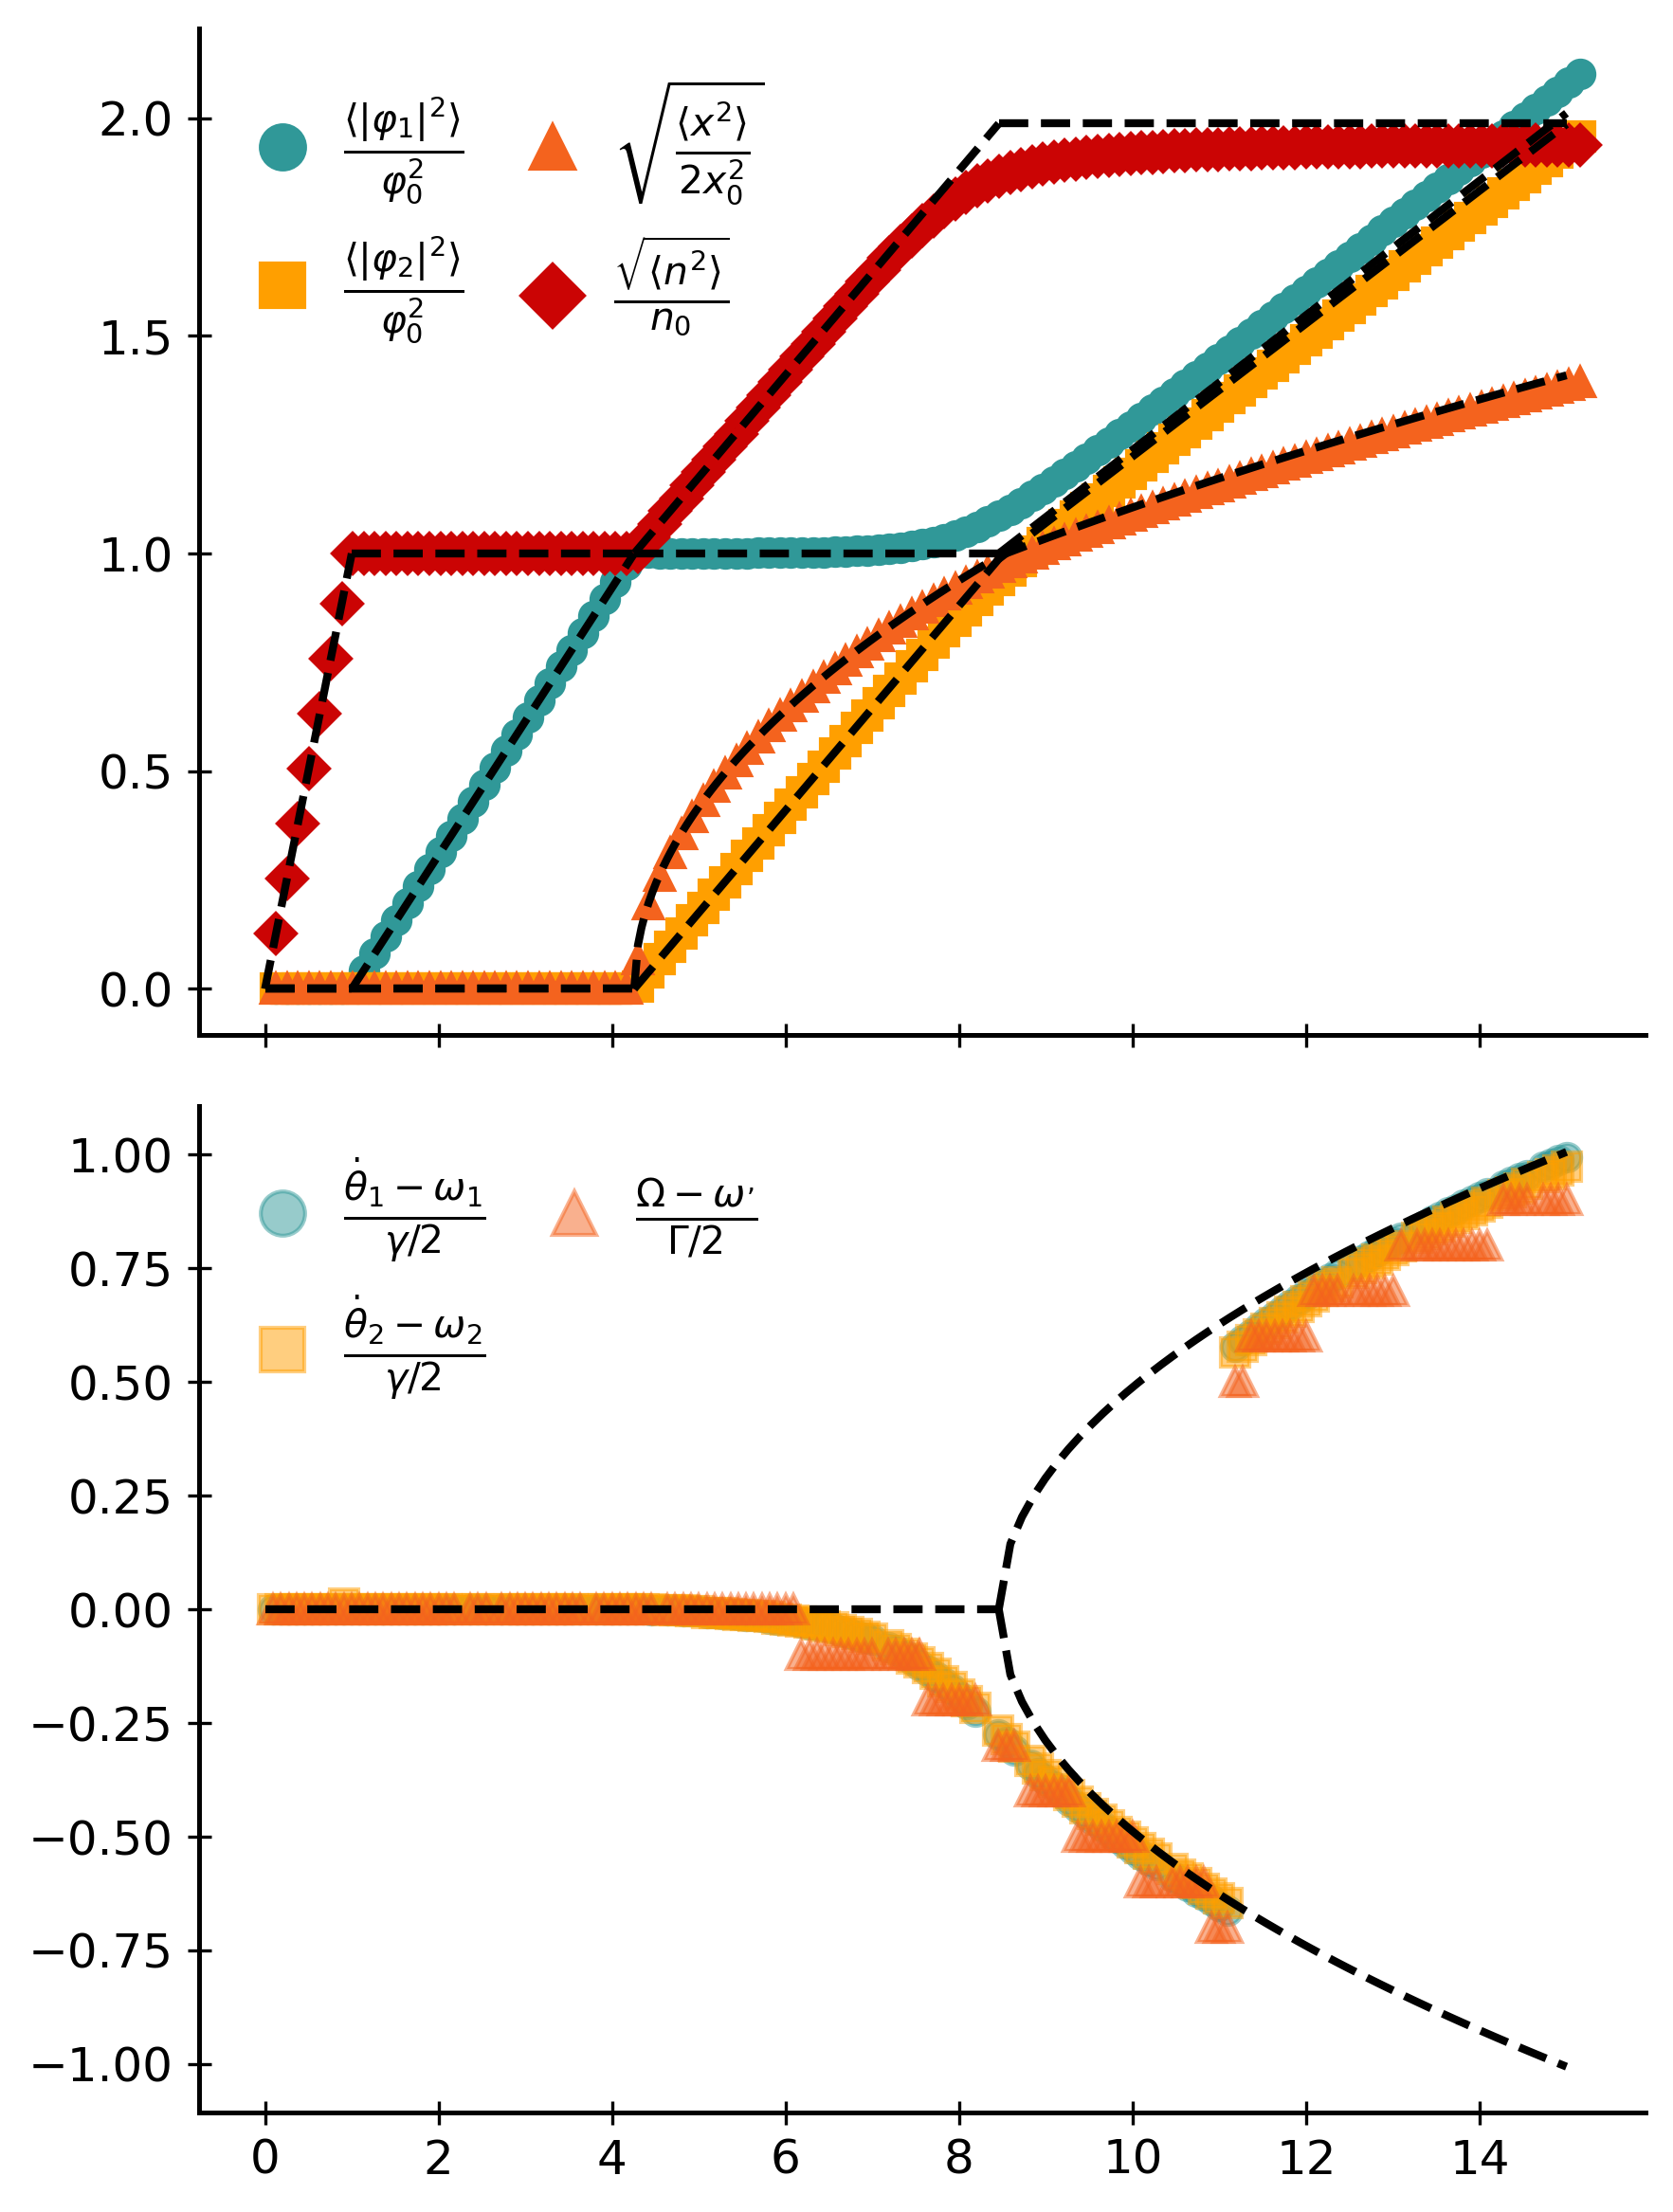

In [157]:
plt.rcParams.update({
    "figure.figsize": (4, 3),         # Compact figure
    "figure.dpi": 300,                # High resolution for posters
    "font.size": 14,                  # Larger text
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "lines.linewidth": 2.5,           # Thicker lines
    "lines.markersize": 7,            # Larger markers
    "axes.spines.top": False,         # Clean up frame
    "axes.spines.right": False,
    "axes.linewidth": 1.2,
    "xtick.major.size": 6,            # Larger ticks
    "ytick.major.size": 6,
    "xtick.direction": "inout",       # Compact but readable ticks
    "ytick.direction": "inout",
    "legend.frameon": False           # Cleaner legend
})
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
ax1.plot(P_paradigma, phi1_paradigma/phi0, linestyle='', label = r'$\frac{\langle \vert \varphi_1 \vert^2\rangle}{\varphi_0^2}$')
ax1.plot(P_paradigma, phi2_paradigma/phi0, linestyle='', label = r'$\frac{\langle \vert \varphi_2 \vert^2\rangle}{\varphi_0^2}$')
ax1.plot(P_paradigma, np.sqrt(x_paradigma/2)/(A0), linestyle='', label = r'$\sqrt{\frac{\langle x ^2\rangle}{2 x_0^2}}$')
ax1.plot(P_paradigma, np.sqrt(n_paradigma)/n0, linestyle='', label = r'$\frac{\sqrt{\langle n^2\rangle}}{n_0}$')

alpha_2 = 3.2552
f1 = np.linspace(0, 1, 100)
f2 = np.linspace(1, 1+alpha_2, 100)
f3 = np.linspace(1+alpha_2,(2-0.025/2)*(1+alpha_2), 100) 
f4 =np.linspace((2-0.025/2)*(1+alpha_2), 15, 100)

phi1_1 = np.zeros(100)
phi2_1 = np.zeros(100)
x_1 = np.zeros(100)
n_1 = f1

phi1_2 = (f2-1)/(alpha_2)
phi2_2 = np.zeros(100)
x_2 = np.zeros(100)
n_2 = np.ones(100)

phi1_3 = np.ones(100)
phi2_3 = (f3-(1+alpha_2))/(1+alpha_2)
x_3 = np.sqrt((f3-(1+alpha_2))/(alpha_2+1))
n_3 = (f3)/(alpha_2+1)

phi1_4 = (f4/(2-0.025/2) - 1)/alpha_2
phi2_4 = (1-0.025/2)*phi1_4
x_4 = np.sqrt(phi2_4)
n_4 = 2-0.025/2*np.ones(len(f4))
ax1.legend(
    loc='best',
    fontsize=14,          # bigger text
    markerscale=1.6,      # bigger markers in legend
    handlelength=1.2, 
    handletextpad=0.5, 
    borderpad=0.4, 
    frameon=False,
    ncol=2,
    columnspacing=1.0
)

ax1.plot(f1, phi1_1, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="" )
ax1.plot(f1, phi2_1, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f1, x_1, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f1, n_1, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")

ax1.plot(f2, phi1_2, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f2, phi2_2, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f2, x_2, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f2, n_2, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")

ax1.plot(f3, phi1_3, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f3, phi2_3, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f3, x_3, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f3, n_3, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")

ax1.plot(f4, phi1_4, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f4, phi2_4, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f4, x_4, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax1.plot(f4, n_4, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")

f1_freq = np.linspace(0, (2-0.025/2)*(1+alpha_2))
f2_freq = np.linspace((2-0.025/2)*(1+alpha_2), max(P_fourier[:-30]))
freq1 = np.zeros(len(f1_freq))
freq2 = np.sqrt((f2_freq/(2-0.025/2) - (1+alpha_2))/alpha_2)

ax2.plot(P_fourier[:-30], phi1_freq[:-30], label=r'$\frac{\dot \theta_1 - \omega_1}{\gamma/2}$', linestyle = '', alpha= 0.5)
ax2.plot(P_fourier[:-30], phi2_freq[:-30], label=r'$\frac{\dot \theta_2-\omega_2}{\gamma/2}$', linestyle = '', alpha= 0.5)
ax2.plot(P_fourier[:-30], (20-x_freq[:-30])/(0.05/2), label = r'$\frac{\Omega - \omega^{,}}{\Gamma/2}$', linestyle = '', alpha= 0.5)
ax2.plot(f2_freq, freq2, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax2.plot(f1_freq, freq1, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax2.plot(f2_freq, -freq2, linewidth = 2, linestyle = 'dashed', color = 'black', marker ="")
ax2.legend(
    loc='best',
    fontsize=14,          # bigger text
    markerscale=1.6,      # bigger markers in legend
    handlelength=1.2, 
    handletextpad=0.5, 
    borderpad=0.4, 
    frameon=False,
    ncol=2,
    columnspacing=1.0
)
plt.tight_layout()
plt.savefig('phase_dynamics.png')

In [120]:
(f2_freq/(2-0.025/2) - (1+alpha_2))/alpha_2

array([-0.00822139,  0.0223351 ,  0.05289159,  0.08344807,  0.11400456,
        0.14456105,  0.17511754,  0.20567402,  0.23623051,  0.266787  ,
        0.29734349,  0.32789997,  0.35845646,  0.38901295,  0.41956944,
        0.45012592,  0.48068241,  0.5112389 ,  0.54179539,  0.57235187,
        0.60290836,  0.63346485,  0.66402133,  0.69457782,  0.72513431,
        0.7556908 ,  0.78624728,  0.81680377,  0.84736026,  0.87791675,
        0.90847323,  0.93902972,  0.96958621,  1.0001427 ,  1.03069918,
        1.06125567,  1.09181216,  1.12236865,  1.15292513,  1.18348162,
        1.21403811,  1.2445946 ,  1.27515108,  1.30570757,  1.33626406,
        1.36682055,  1.39737703,  1.42793352,  1.45849001,  1.4890465 ])

In [ ]:
datos_driving_2 = pd.read_csv(data_directory + 'output_driving_2.dat', delimiter = '\t', header = None)
f_driving_2=datos_driving_2[0].to_numpy(dtype = float)
phi1_driving_2 = datos_driving_2[1].to_numpy(dtype= float)
phi2_driving_2 = datos_driving_2[2].to_numpy(dtype = float)
x_driving_2 = datos_driving_2[3].to_numpy(dtype = float)

datos_overpowered = pd.read_csv(data_directory + 'mapa_overpowered.dat', delimiter = '\t', header = None)
f_overpowered=datos_overpowered[0].to_numpy(dtype = float)
phi1_overpowered = datos_overpowered[1].to_numpy(dtype= float)
phi2_overpowered = datos_overpowered[2].to_numpy(dtype = float)
x_overpowered = datos_overpowered[3].to_numpy(dtype = float)

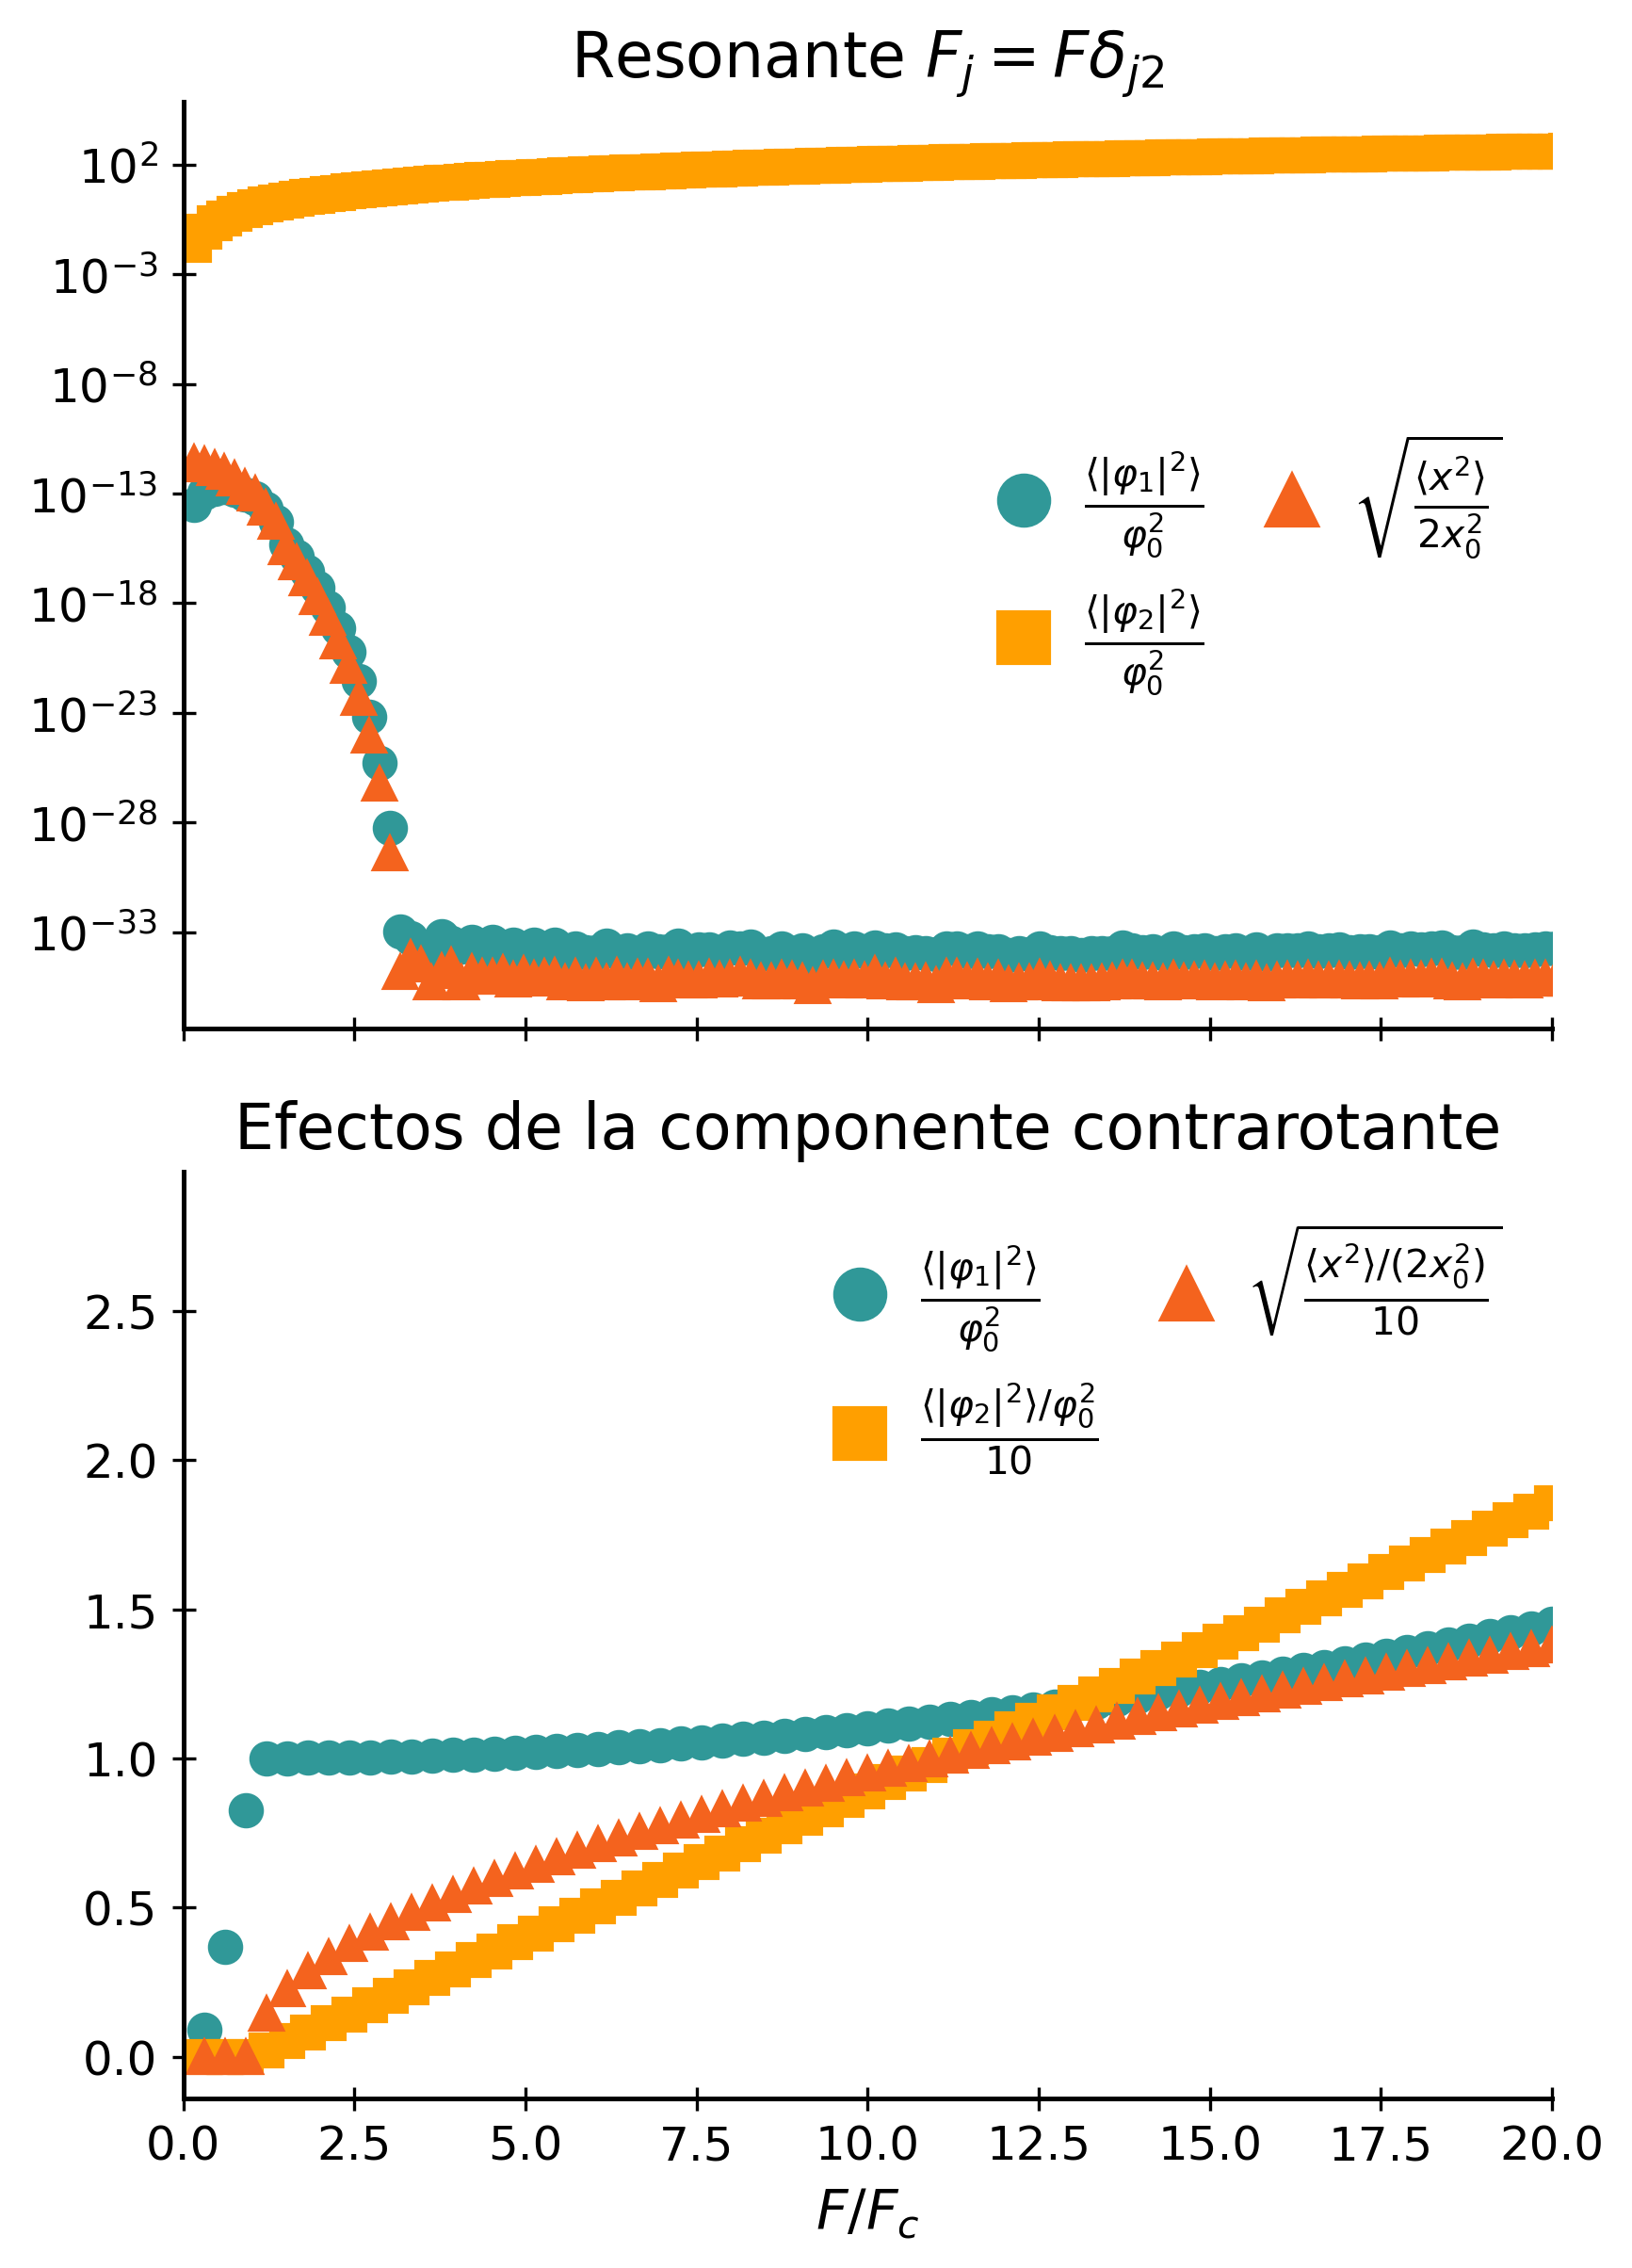

In [154]:
plt.rcParams.update({
    "figure.figsize": (4, 3),         # Compact figure
    "figure.dpi": 300,                # High resolution for posters
    "font.size": 14,                  # Larger text
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "lines.linewidth": 2.5,           # Thicker lines
    "lines.markersize": 8,            # Larger markers
    "axes.spines.top": False,         # Clean up frame
    "axes.spines.right": False,
    "axes.linewidth": 1.2,
    "xtick.major.size": 6,            # Larger ticks
    "ytick.major.size": 6,
    "xtick.direction": "inout",       # Compact but readable ticks
    "ytick.direction": "inout",
    "legend.frameon": False           # Cleaner legend
})
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
ax2.plot(f_overpowered, phi1_overpowered, linestyle='', label = r'$\frac{\langle \vert \varphi_1 \vert^2\rangle}{\varphi_0^2}$')
ax2.plot(f_overpowered, phi2_overpowered/10, linestyle='', label = r'$\frac{\langle \vert \varphi_2 \vert^2\rangle/\varphi_0^2}{10}$')
ax2.plot(f_overpowered, np.sqrt(x_overpowered/20), linestyle='', label = r'$\sqrt{\frac{\langle x ^2\rangle/(2 x_0^2)}{10}}$')
ax1.set_yscale('log')

ax1.plot(f_driving_2, phi1_driving_2, linestyle='', label = r'$\frac{\langle \vert \varphi_1 \vert^2\rangle}{\varphi_0^2}$')
ax1.plot(f_driving_2, phi2_driving_2, linestyle='', label = r'$\frac{\langle \vert \varphi_2 \vert^2\rangle}{\varphi_0^2}$')
ax1.plot(f_driving_2, x_driving_2, linestyle='', label = r'$\sqrt{\frac{\langle x ^2\rangle}{2 x_0^2}}$')
ax1.legend(
    loc='best',
    fontsize=14,          # bigger text
    markerscale=1.6,      # bigger markers in legend
    handlelength=1.2, 
    handletextpad=0.5, 
    borderpad=0.4, 
    frameon=False,
    ncol=2,
    columnspacing=1.0
)
ax2.legend(
    loc='best',
    fontsize=14,          # bigger text
    markerscale=1.6,      # bigger markers in legend
    handlelength=1.2, 
    handletextpad=0.5, 
    borderpad=0.4, 
    frameon=False,
    ncol=2,
    columnspacing=1.0
)
ax1.set_title(r'Resonante $F_j = F \delta_{j2}$')
ax2.set_title('Efectos de la componente contrarotante')
plt.xlim([0, 20])
plt.tight_layout()
plt.xlabel(r'$F/F_c$')
plt.savefig('efectos_high_F.png')